# Statistics and Data Science: Data acquisition and cleaning with Pandas

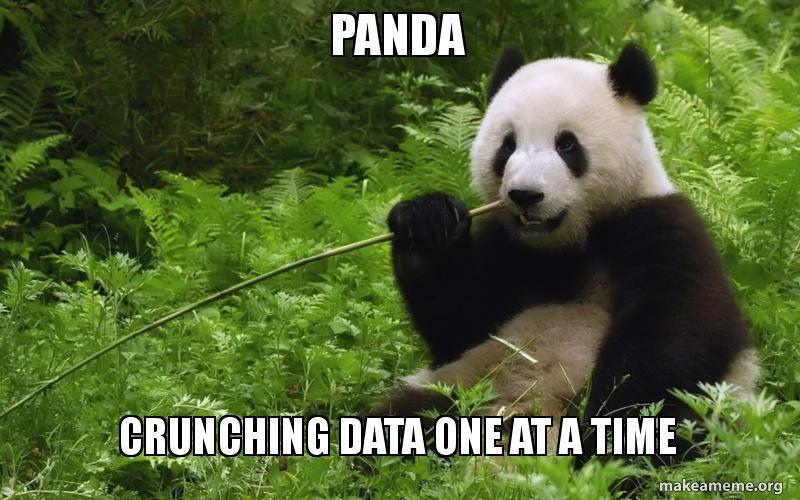

Source: Roman Orac [Pandas Web API - Towards Data Science](https://towardsdatascience.com/pandas-analytics-server-d64d20ef01be)

## Content

- [Library, Packages and Modules](#Library,-Packages-and-Modules)
   - [Import packages](#Import-packages)
   - [Writing your own module](#Writing-your-own-module)
   - [Import and updates](#Import-and-updates)
   - [Style Guide for Python Code](#Style-Guide-for-Python-Code)
- [Pandas](#Pandas)
   - [Importing data](#Importing-data)
   - [Discovering your data frame](#Discovering-your-data-frame)
      - [Dimensions of data frame](#Dimensions-of-data-frame)
      - [Data frame indexing](#Data-frame-indexing)
      - [Scope: data types](#Scope:-data-types)
      - [Scope: Extract unique values in a column](#Scope:-Extract-unique-values-in-a-column)
   - [Cleaning your data frame](#Cleaning-your-data-frame)
      - [Identifying NaN](#Identifying-NaN)
      - [Droping NaN](#Droping-NaN)
      - [Dealing with errors and other missing values](#Dealing-with-errors-and-other-missing-values)
   - [Merging data frames](#Merging-data-frames)
   - [Manipulating your data](#Manipulating-your-data)
      - [Operating on columns](#Operating-on-columns)
      - [Functions and data frame](#Functions-and-data-frame)
      - [Calculating GrDP](#Calculating-GrDP)
   - [Exporting data frame](#Exporting-data-frame)

## Library, Packages and Modules

Until now, we have operated on our data using built-in functions, operators, and objects' methods. We already performed quite neat operations thanks to the Python Standard Library, which has lots of built-in modules that contain useful functions and data types for doing specific tasks. But we can also use modules from outside the standard library, and we can even write our own modules!

A **module** is contained in a file that ends with `.py`. This file can have **classes**, functions, and other objects. We will not discuss classes for now, just remember that a class is like an object constructor, or a "blueprint" for creating objects (Check the [Documentation](https://docs.python.org/3/tutorial/classes.html) to learn more and a nice introduction from [GeeksforGeeks](https://www.geeksforgeeks.org/python-classes-and-objects/)).

A **package** contains several related modules that are all grouped together under one name. For instance, [Pandas](http://pandas.pydata.org) (derived from "panel data") is the go-to package for data analysis and manipulation. Another fundamental package for scientific computing is [NumPy](http://www.numpy.org) (Numerical Python).

A **library** is an umbrella term referring to a reusable chunk of code, which usually contains a collection of related modules and packages. For instance, [Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations. In practice, library and package are often used interchangeably.

Standard Python installations come with the standard library. Outside of the standard library, there are several packages available such as pandas and NumPy. Several. Ha! There are currently more than 300,000 packages available through the [Python Package Index](https://pypi.python.org/pypi), PyPI! Usually, you can ask Google about what you are trying to do, and there is often a third party module to help you do it. The most useful (for scientific computing) and thoroughly tested packages and modules are available using `conda`. Others can be installed using `pip`.

We will discover several other packages along our journey, but for now let's discover how to access and use packages and modules.  

### Import packages

To access a package, we have to `import` it. For instance, let's import the `numpy` package:

In [4]:
import numpy

That's it! Now we can start using the numerous functionalities offered by `numpy` such as means, medians, standard deviations, and lots and lots and lots of other numerical operations. Let's explore what is available in `numpy`. Remember, in Python everything is an object, so if we want to access the methods and attributes available in `numpy`, we use dot syntax. In a Jupyter notebook, we can type `numpy.` and then hit tab to discover what the module offers, Note that this technique works for all objects, so do not hesitate to use it for instance when, for instance, you do not remember the name of a method:

In [ ]:
numpy.

That's a lot of options! Let's try the `numpy.mean()` function:

In [10]:
my_lis = [1,2,3,4,5,6]

numpy.mean(my_lis)

3.5

Nice! Let's try the `numpy.median()` function:

In [11]:
numpy.median(my_lis)

3.5

This is nice. It gives the median, including when we have an even number of elements in the sequence of numbers, in which case it automatically interpolates. It is really important to know that it does this interpolation, since if you are not expecting it, it can give unexpected results. So, here is an important piece of advice:

<div style="color: dodgerblue; text-align: center; font-weight: bold;">

Always check the doc strings of functions.    

</div>

We can access the doc string of the `numpy.median()` function in JupyterLab by typing `numpy.median?`:

In [ ]:
numpy.median?

See in the output: 

    Notes
    -----
    Given a vector ``V`` of length ``N``, the median of ``V`` is the
    middle value of a sorted copy of ``V``, ``V_sorted`` - i
    e., ``V_sorted[(N-1)/2]``, when ``N`` is odd, and the average of the
    two middle values of ``V_sorted`` when ``N`` is even.

This is where the documentation tells you that the median will be reported as the average of two middle values when the number of elements is even. Note that you could also read the [median documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html), which is a bit easier to read. And you can check the [Numpy Documentation](https://numpy.org/doc/stable/) to discover the full extent of `numpy` power! 

As you can see, `numpy`and other modules are super useful and we will use then all the time. There is a drawback: we always have to use the dot syntax with the full name of the module to access the methods it contains, and typing `numpy` over and over again can get annoying... Wait a minute, you do not actually have to do that! We can use the `as` keyword to import a module as an **alias**. Numpy's alias is traditionally `np`, so you shall always use this alias:

In [13]:
import numpy as np

np.mean([1.1, 8.4, 5.3, 6.7, 9.2])

6.14

Finally, you do not have the import the full package/module if you want to use only a specific element. For example, suppose we need the value of pi, which can be accessed via the `math` module ([Documentation](https://docs.python.org/3/library/math.html). We could do as before, importing the full module:

In [2]:
import math

math.pi

3.141592653589793

Alternatively, we only import `pi`:

In [3]:
from math import pi

pi

3.141592653589793

Amazing, when using from-import, we do not need to use the dot syntax! Indeed, in this example, we did not import the full module, rather just `pi` as a variable.

Packages and modules are super convenient. If you want to do something that seems really common, a good programmer (or a team of them) probably already wrote something to do that. So always check online what is there before jumping in into coding complex pieces of codes! 

### Writing your own module

In week 2, we learned how to create functions. We defined for instance the Cobb-Douglas production function directly in our notebook. An alternative would be to write our own module containing functions that we are using, and then import our module. 

To write our own module, we need to create a `.py` file, for instance using a text or python editor. Let's write a module containing some of the functions we have previously used in our adventure, such as `cobb_douglas()`, `fibonacci()`, and `threshold_morality()`. We call our module `my_module`, creating the file `my_module.py`. As a good practice, it is always best to start our file with a doc string explaining what the module contains.

Ok, now let's import our module:

In [16]:
import my_module

Note that when you import a module, the Python interpreter will look first in the working directory to find the module. You can print your working directory with `pwd`:

In [ ]:
pwd

Let's check the documentation of our module:

In [17]:
my_module?

Type:        module
String form: <module 'my_module' from 'C:\\Users\\thurm\\GitHub\\MGT-499\\notebooks_not_released\\my_module.py'>
File:        c:\users\thurm\github\mgt-499\notebooks_not_released\my_module.py
Docstring:   This module contains some functions we previously defined.


Finally, we can use the functions contained in our module, the same way we did with NumPy functions:

In [3]:
my_module.cobb_douglas(36, 47)

38.866256620617925

### Import and updates

Once you have imported a module or package, the interpreter stores its contents in memory. Thus, you cannot update the contents of the package and expect the interpreter to know about the changes. You will need to restart the kernel and then import the package again in a fresh instance. This ensures that code you are running does not change as you go through executing a notebook. However, when developing modules, it is sometimes convenient to have an imported module be updated as you run through the notebook as you are editing. To enable this, you can use the [autoreload extension](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html). To activate it, run the following in a code cell.

```python
%load_ext autoreload
%autoreload 2
```

Whenever you run a cell, imported packages and modules will be automatically reloaded.

### Style Guide for Python Code

There are some good practices when writing Python code. A great Python style guide is [PEP 8](https://www.python.org/dev/peps/pep-0008/). Here is the recommendation about importing libraries, packages, and modules:  

>Imports are always put at the top of the file, just after any module comments and docstrings, and before module globals and constants.
>
>Imports should be grouped in the following order:
>
>1. standard library imports
>2. related third party imports
>3. local application/library specific imports
>
>You should put a blank line between each group of imports.

Try to follow this guide!

## Pandas

Throughout your career, you will undoubtedly need to handle data, possibly lots of data. Data comes in lots of formats, and you will spend much of your time manipulating and cleaning it to obtain usable form for analysis.

As mentioned before, Pandas (derived from "panel data") is the go-to package for data analysis and manipulation. Its primary object, the `DataFrame` is extremely useful in wrangling data. We will explore some of that functionality here, and will put it to use in all along this course.

You can read more about Pandas in the [documentation](https://pandas.pydata.org/docs/index.html), and you can refine your knowledge with this [online course and tutorial](https://realpython.com/learning-paths/pandas-data-science/). Since Pandas is one of the most used package, you can also find a ton of material online, answering any questions you might have. As always, there is no need to reinvent the wheel, and you should rely on the years of experience and knowledge of programmers who already faced similar issues you might encounter. 

Without further ado, let's import Pandas. We generally `import` `pandas` `as` `pd`:

In [2]:
import pandas as pd

### Importing data

Now the fun begins! We will discover the functionalities offered by Pandas using "real" data. More precisely, we will do an application on the Green Domestic Product (GrDP).

GrDP is a novel indicator developed by E4S to remedy some of the shortcomings of GDP. GrDP extends the scope of the GDP to integrate the depletion of natural, social, and human capital. In its current version, GrDP considers the impacts of the emissions of three groups of pollutants: greenhouse gases, air pollutants, and heavy metals. These impacts include climate change, health issues, decrease in crops' yields and biomass production, buildings degradation, and damages to ecosystems due to eutrophication. 

To learn more, you can read the recent E4S white paper applying GrDP to Switzerland and the methodological report [here](https://e4s.center/en/resources/reports/green-domestic-product/). The IbyIMD magazine also published an [article](https://iby.imd.org/sustainability/lets-replace-gdp-introducing-the-green-domestic-product/) to introduce GrDP and its application for policymakers and businesses. Finally, you can explore the results of the project in our [online dashboard](https://public.tableau.com/app/profile/jordane.widmer/viz/GrDP-InteractiveInterface/Tableaudebord1).

First, we need to import our data. The data set was uploaded to our GitHub folder as a CSV file. We can directly import online CSV file using the `.read_csv()` function:

In [5]:
url = "https://raw.githubusercontent.com/edoardochiarotti/class_datascience/main/Notebooks/Week_04/data/GrDP_Panel-Data.csv"

df=pd.read_csv(url)

type(df)

pandas.core.frame.DataFrame

You can import data from a variety of sources. Let's import the local Excel file "GrDP_Cost.xlsx". It is located in our data folder, and this time we use the `.read_excel()` function:

In [13]:
df_cost = pd.read_excel("data/GrDP_Cost.xlsx")

You can also import data from TSV, HTML, JSON, etc., define specific columns to import, and even rename them! Learn more [how to import data into Pandas dataframes](https://practicaldatascience.co.uk/data-science/how-to-import-data-into-pandas-dataframes).

### Discovering your data frame

The first thing you want to do is explore your data frame to understand its structure and what it contains. In a notebook, we can directly look at it in a nice, visual way:

In [16]:
df

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],Emissions_NH3 [tonne],Emissions_Pb [tonne],Emissions_Cd [tonne],Emissions_Hg [tonne],Emissions_As [tonne],Emissions_Ni [tonne],Emissions_Cr [tonne]
0,Belgium,1990,NaN,9947782.0,142750.63,428830,49270,67570,364540,348240,129730,253,6,6,7,77,36
1,Bulgaria,1990,NaN,8767308.0,80468.09,273150,22860,42800,1105720,440600,102130,448,6,3,25,33,21
2,Czechia,1990,NaN,10362102.0,189911.77,748990,298500,429020,1754560,566030,170490,318,5,5,70,55,26
3,Denmark,1990,108898.0,5135409.0,77995.13,302240,24600,36300,178040,215360,130770,130,1,3,1,19,6
4,Germany,1990,1245386.0,62679035.0,1268921.81,2850050,235770,375360,5474420,3890840,715080,1900,29,35,86,340,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Finland,2019,239858.0,5517919.0,39198.47,119810,16620,30030,28930,84520,31590,13,1,1,2,12,14
896,Sweden,2019,476869.5,10230185.0,14074.24,127030,17570,36720,16380,134000,53410,8,0,0,1,6,6
897,Norway,2019,361734.6,5328212.0,34650.02,150560,23530,32090,16270,152500,28550,6,1,0,1,0,4
898,Switzerland,2019,653732.6,8544527.0,43981.61,61330,6150,14130,4440,81150,53800,15,1,1,0,0,0


This is a nice representation of the data, but we really do not need to display that many rows of the data frame in order to understand its structure. Instead, we can use the `.head()` method of data frames to look at the first few rows:

In [17]:
df.head()

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],Emissions_NH3 [tonne],Emissions_Pb [tonne],Emissions_Cd [tonne],Emissions_Hg [tonne],Emissions_As [tonne],Emissions_Ni [tonne],Emissions_Cr [tonne]
0,Belgium,1990,NaN,9947782.0,142750.63,428830,49270,67570,364540,348240,129730,253,6,6,7,77,36
1,Bulgaria,1990,NaN,8767308.0,80468.09,273150,22860,42800,1105720,440600,102130,448,6,3,25,33,21
2,Czechia,1990,NaN,10362102.0,189911.77,748990,298500,429020,1754560,566030,170490,318,5,5,70,55,26
3,Denmark,1990,108898.0,5135409.0,77995.13,302240,24600,36300,178040,215360,130770,130,1,3,1,19,6
4,Germany,1990,1245386.0,62679035.0,1268921.81,2850050,235770,375360,5474420,3890840,715080,1900,29,35,86,340,166


Nice! We can see that the data includes the GDP, population, and emissions of various pollutants for several countries and years. Let's continue our exploration!

#### Dimensions of data frame

When we look at our whole data frame, the dimensions of our data frame were printed below the table (900 rows x 17 columns). We can also directly extract the number of observations (rows) using the `len()` function:

In [18]:
len(df)

900

Similarly, using the `len()` function and the `.columns` method, we have access to the number of variables (columns):

In [19]:
len(df.columns)

17

We can also use directly return the number of observations and variables using the `.shape` method:

In [78]:
df.shape

(900, 17)

Going on with our exploration, we can print the names of the columns. As often there are several ways depending on what we want to achieve. Here are some options:
- `list(df.columns)` returns a list of our columns,
- `sorted(df)` returns a sorted list of our columns,
- `df.keys()` returns a pandas Index object

In [25]:
df.keys()

Index(['Country', 'Year', 'GDP [million Euro]', 'Population',
       'Emissions_GHG [thousand tonnes CO2eq]', 'Emissions_NOx [tonne]',
       'Emissions_PM2.5 [tonne]', 'Emissions_PM10 [tonne]',
       'Emissions_SOx [tonne]', 'Emissions_NMVOC [tonne]',
       'Emissions_NH3 [tonne]', 'Emissions_Pb [tonne]', 'Emissions_Cd [tonne]',
       'Emissions_Hg [tonne]', 'Emissions_As [tonne]', 'Emissions_Ni [tonne]',
       'Emissions_Cr [tonne]'],
      dtype='object')

#### Data frame indexing

Once we have understood the structure of our data frame, it is a good idea to look at some observations. 

We **index data frames by columns**. For instance, let's have a look at countries' population:  

In [27]:
df['Population']

0       9947782.0
1       8767308.0
2      10362102.0
3       5135409.0
4      62679035.0
          ...    
895     5517919.0
896    10230185.0
897     5328212.0
898     8544527.0
899    66647112.0
Name: Population, Length: 900, dtype: float64

What if we want to extract a specific value? Well, did you notice on the left of our data frame, there was a nameless column. Nameless but not useless, this column is the row labels. 

We can use the label to extract a given value. For example, let's say we want to extract the population of Belgium in 1990 (first row), one way is to use the syntax `df['Population'][0]`. However, the preferred way is to use the `.loc` method, short for location:

In [29]:
df.loc[0, 'Population']

9947782.0

What if we want several values, say population and GDP? Easy! We can use lists specifying the labels of row and columns to extract subset of our data frame.

In [36]:
df.loc[[3,87], ['Country', 'Year','GDP [million Euro]','Population']]

,Country,Year,GDP [million Euro],Population
3,Denmark,1990,108898.0,5135409.0
87,Norway,1992,101108.3,4273634.0


We can even extract an entire row with `.loc`:

In [54]:
df.loc[0]

Country                                    Belgium
Year                                          1990
GDP [million Euro]                             NaN
Population                               9947782.0
Emissions_GHG [thousand tonnes CO2eq]    142750.63
Emissions_NOx [tonne]                       428830
Emissions_PM2.5 [tonne]                      49270
Emissions_PM10 [tonne]                       67570
Emissions_SOx [tonne]                       364540
Emissions_NMVOC [tonne]                     348240
Emissions_NH3 [tonne]                       129730
Emissions_Pb [tonne]                           253
Emissions_Cd [tonne]                             6
Emissions_Hg [tonne]                             6
Emissions_As [tonne]                             7
Emissions_Ni [tonne]                            77
Emissions_Cr [tonne]                            36
Name: 0, dtype: object

Remember when we did list slicing? We can do similar operations here:

In [72]:
df.loc[1:10:2, 'Country':'Population']

,Country,Year,GDP [million Euro],Population
1,Bulgaria,1990,NaN,8767308.0
3,Denmark,1990,108898.0,5135409.0
5,Estonia,1990,NaN,1570599.0
7,Greece,1990,NaN,10120892.0
9,France,1990,999521.7,NaN


Now imagine that we want to use numerical index for columns, instead of labels. Well, there is a way! We can use the`.iloc` method to index data frames based on the integer-location rows and columns. As always in Python, indexing starts at 0. Let's extract the same data subset as before, this time using `iloc`:

In [45]:
df.iloc[1:10:2, 0:4]

,Country,Year,GDP [million Euro],Population
1,Bulgaria,1990,NaN,8767308.0
3,Denmark,1990,108898.0,5135409.0
5,Estonia,1990,NaN,1570599.0
7,Greece,1990,NaN,10120892.0
9,France,1990,999521.7,NaN


As a parenthesis, note that in our case, the label column is using integers - this is the default when importing data. Hence, extracting rows with `.loc` and `iloc` is using the same syntax... Almost:
- `.loc` gets rows and columns with particular **labels** (in our case, integers)
-`.iloc` gets rows and columns at integer **locations**

How does it affect us? Well, one difference is slicing. While `.iloc` works the same as slicing lists, `.loc` is a little bit different. For example, if we pass as argument `[0:1]`, `.iloc` would only return the first row (as with lists, slicing excludes the last element), but `.loc` would return the two rows with labels 0 and 1:

In [57]:
df.loc[0:1]

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],Emissions_NH3 [tonne],Emissions_Pb [tonne],Emissions_Cd [tonne],Emissions_Hg [tonne],Emissions_As [tonne],Emissions_Ni [tonne],Emissions_Cr [tonne]
0,Belgium,1990,NaN,9947782.0,142750.63,428830,49270,67570,364540,348240,129730,253,6,6,7,77,36
1,Bulgaria,1990,NaN,8767308.0,80468.09,273150,22860,42800,1105720,440600,102130,448,6,3,25,33,21


In [83]:
df.iloc[0:1]

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],Emissions_NH3 [tonne],Emissions_Pb [tonne],Emissions_Cd [tonne],Emissions_Hg [tonne],Emissions_As [tonne],Emissions_Ni [tonne],Emissions_Cr [tonne]
0,Belgium,1990,NaN,9947782.0,142750.63,428830,49270,67570,364540,348240,129730,253,6,6,7,77,36


Similarly, `df.iloc[-1]` would allow us to access the last line, but `df.loc[-1]` would yield an error since there is no row labeled '-1'. For a more extensive discussion of the differences between `.loc` and `.iloc`, see this [Stack Overflow post](https://stackoverflow.com/questions/31593201/how-are-iloc-and-loc-different#:~:text=The%20main%20distinction%20between%20the,or%20columns%29%20at%20integer%20locations).

Both methods, `.loc` and `.iloc`, are very helpful, but you need to know the label or location of your data. Now what if we want to access data based on a given column value. For instance, what if we want to extract data only for Switzerland? We know neither the labels nor the locations of the rows corresponding to Switzerland... Such operation seems super common - for example you could imagine having company/customer data with some ID numbers or names - so there must be a way. Indeed, there is! We can use a condition:  

In [91]:
df[df['Country'] == 'Switzerland']

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],Emissions_NH3 [tonne],Emissions_Pb [tonne],Emissions_Cd [tonne],Emissions_Hg [tonne],Emissions_As [tonne],Emissions_Ni [tonne],Emissions_Cr [tonne]
28,Switzerland,1990,209686.3,6673850.0,51936.33,144540,16400,25220,36700,304870,68730,380,3,6,Not Available,Not Available,Not Available
58,Switzerland,1991,217731.6,6757188.0,50666.87,141350,16620,25350,36390,287880,67840,351,3,6,Not Available,Not Available,Not Available
88,Switzerland,1992,216721.6,6842768.0,51299.11,134610,15990,24630,33980,268070,67400,322,3,6,Not Available,Not Available,Not Available
118,Switzerland,1993,232687.8,6907959.0,48554.46,122650,15210,23610,29070,241320,66460,265,3,5,Not Available,Not Available,Not Available
148,Switzerland,1994,254448.5,6968570.0,48860.45,120130,14450,22750,26320,223390,66220,233,3,5,Not Available,Not Available,Not Available
178,Switzerland,1995,270155.4,7019019.0,48986.59,115870,14020,21930,26120,208600,66010,171,2,4,Not Available,Not Available,Not Available
208,Switzerland,1996,268398.8,7062354.0,48052.24,110100,13860,21640,24690,197060,64590,147,2,4,Not Available,Not Available,Not Available
238,Switzerland,1997,260529.0,7081346.0,48523.84,105770,12920,20640,21400,185020,62130,132,2,3,Not Available,Not Available,Not Available
268,Switzerland,1998,271620.6,7096465.0,51076.84,105180,12460,20120,22140,172940,61530,91,2,3,Not Available,Not Available,Not Available
298,Switzerland,1999,280220.9,7123537.0,51304.11,104700,12130,19530,19260,163490,60930,54,1,2,Not Available,Not Available,Not Available


Note the syntax: 
- `df['Country']` extracts our column labeled 'Country' ,
- `df['Country'] == 'Switzerland'` returns a column of `True` if the country is Switzerland, and `False` otherwise,
- When feeding this condition to our data frame `df`, it will only keep the rows for which the condition is `True`

Let's try another one, this time extracting data for Switzerland in 2019. We can use `&` to include a second condition. We did not cover this **bitwise operator** before, but the syntax is self-explanatory in the example below. Note that it is important that each Boolean operation you are doing is in parentheses because of the precedence of the operators involved. 

In pandas, the bitwise operators perform element-wise comparisons. That's what we want to do here: find **for each row** if the country is Switzerland and if the year is 2019.

In [101]:
df[(df['Country'] == 'Switzerland') & (df['Year'] == 2019)]

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],Emissions_NH3 [tonne],Emissions_Pb [tonne],Emissions_Cd [tonne],Emissions_Hg [tonne],Emissions_As [tonne],Emissions_Ni [tonne],Emissions_Cr [tonne]
898,Switzerland,2019,653732.6,8544527.0,43981.61,61330,6150,14130,4440,81150,53800,15,1,1,0,0,0


We can also select some columns, but in this case, we also need to use the `.loc` method:

In [94]:
df.loc[(df['Country'] == 'Switzerland') & (df['Year'] == 2019), ['GDP [million Euro]','Emissions_GHG [thousand tonnes CO2eq]']]

,GDP [million Euro],Emissions_GHG [thousand tonnes CO2eq]
898,653732.6,43981.61


Or a slice of columns, for instance all the emissions of air pollutants:

In [95]:
df.loc[(df['Country'] == 'Switzerland') & (df['Year'] == 2019), 'Emissions_NOx [tonne]':'Emissions_NH3 [tonne]']

,Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],Emissions_NH3 [tonne]
898,61330,6150,14130,4440,81150,53800


#### Scope: data types

Let's keep on exploring our data frame. We can identify the types of our variables using the method `.dtypes()`: 

In [82]:
df.dtypes

Country                                   object
Year                                       int64
GDP [million Euro]                       float64
Population                               float64
Emissions_GHG [thousand tonnes CO2eq]    float64
Emissions_NOx [tonne]                      int64
Emissions_PM2.5 [tonne]                    int64
Emissions_PM10 [tonne]                     int64
Emissions_SOx [tonne]                      int64
Emissions_NMVOC [tonne]                    int64
Emissions_NH3 [tonne]                      int64
Emissions_Pb [tonne]                       int64
Emissions_Cd [tonne]                       int64
Emissions_Hg [tonne]                       int64
Emissions_As [tonne]                      object
Emissions_Ni [tonne]                      object
Emissions_Cr [tonne]                      object
dtype: object

As you can see, Pandas is using different names for data types. Here is a description:

|Pandas type|Native Python type|Description|
|:-------|:-------|:----------|
|`object` | `string` | The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings). |
|`int64` | `int` | Numeric characters. 64 refers to the memory allocated to hold this character. |
|`float64` | `float` | Numeric characters with decimals. If a column contains numbers and NaNs (see below), pandas will default to float64, in case your missing value has a decimal.|

Our data frame contains `object` (e.g., strings like countries), `int64` and `float64`. You may wonder about the emissions of arsenic (As), nickel (Ni), and chromium (Cr), which are apparently `object` type. We will discover why later.

#### Scope: Extract unique values in a column

From the column labels of our data frame, we know that we have data for various countries and years. For example, we have seen before that we have data for Switzerland between 1990 and 2019. Which other country-years are included in our data frame? We can use the `.unique()` method to return the unique values of a column:

In [76]:
df['Country'].unique()

array(['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Norway',
       'Switzerland', 'United Kingdom'], dtype=object)

Ok! So we have for European countries. What about years? We can use the same syntax, but let's discover a new trick! As everything in Python, `df['Country']` is an object, and we apply the `.unique()` method to this object. Instead of `df['Country']`, we can use the equivalent statement `df.Country`. Let's try with the 'Year' column:

In [81]:
df.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

Nice! It seems that we have data from 1990 to 2019. Why "seems"? Well, we may have missing values...

### Cleaning your data frame

Ideally, you would have perfect data and directly perform some statistical or machine learning analysis to uncover the mysterious relationships behind your data. Well, unfortunately, we don't live in a perfect world and your data will never be cleaned, except if someone already performed this fastidious task. In such case, be grateful, data scientists spend most of their time collecting and cleaning data.

We will explore in this section how to clean our data frame. Unfortunately, there is no universal method: each dataset is different, and you will need to design the appropriate techniques depending on your objective and on how your data looks like.

#### Identifying NaN

The first step is to identify missing values. You have probably noticed something called `NaN` in our data frame. For example, for the GDP of Belgium in 1990:

In [27]:
df.loc[0, 'GDP [million Euro]']

nan

`NaN` stands for **Not a Number**, and it can be interpreted as a value that is undefined or unrepresentable. When you import csv data, the following values will be interpreted as `NaN`: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.

We can check whether each value is a `NaN` or not using the `.isna()` method. `.isna()` will return `True` if the values are `NaN`, and `False` otherwise:

In [86]:
df.isna()

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],Emissions_NH3 [tonne],Emissions_Pb [tonne],Emissions_Cd [tonne],Emissions_Hg [tonne],Emissions_As [tonne],Emissions_Ni [tonne],Emissions_Cr [tonne]
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
896,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Ok, that's somewhat useful, but we are only human, we cannot check our 900x17=15300 observations to identify where we have `NaN`. Instead, let's use the power of pandas to pinpoint the location of our `NaN`. We will use the `.sum()` method, to sum over a column. Remember, `True` is associated with the value `1` and `False` with the value `0`, so when summing over a column of `True`/`False`, we are actually counting the number of `True` statement. In our case, we are counting the `Nan` values:

In [87]:
df.isna().sum() 

Country                                    0
Year                                       0
GDP [million Euro]                       113
Population                                 1
Emissions_GHG [thousand tonnes CO2eq]      0
Emissions_NOx [tonne]                      0
Emissions_PM2.5 [tonne]                    0
Emissions_PM10 [tonne]                     0
Emissions_SOx [tonne]                      0
Emissions_NMVOC [tonne]                    0
Emissions_NH3 [tonne]                      0
Emissions_Pb [tonne]                       0
Emissions_Cd [tonne]                       0
Emissions_Hg [tonne]                       0
Emissions_As [tonne]                       0
Emissions_Ni [tonne]                       0
Emissions_Cr [tonne]                       0
dtype: int64

Alright, we are lucky, it seems the problem is coming from the GDP data (and one population observation).

We can extract the observations (rows) for which the GDP or the population is actually `NaN`. Remember what we did when we extracted data for Switzerland? We used a condition as indexing. We do the same here, this time our condition is checking the `NaN` values with `.isna()` but only for the GDP or the Population columns. The bitwise (element-wise) operator corresponding to or is `|`:

In [102]:
df[(df['GDP [million Euro]'].isna()) | (df['Population'].isna())]

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],Emissions_NH3 [tonne],Emissions_Pb [tonne],Emissions_Cd [tonne],Emissions_Hg [tonne],Emissions_As [tonne],Emissions_Ni [tonne],Emissions_Cr [tonne]
0,Belgium,1990,NaN,9947782.0,142750.63,428830,49270,67570,364540,348240,129730,253,6,6,7,77,36
1,Bulgaria,1990,NaN,8767308.0,80468.09,273150,22860,42800,1105720,440600,102130,448,6,3,25,33,21
2,Czechia,1990,NaN,10362102.0,189911.77,748990,298500,429020,1754560,566030,170490,318,5,5,70,55,26
5,Estonia,1990,NaN,1570599.0,37015.28,80050,25440,63830,274740,66550,21550,207,5,1,19,27,18
6,Ireland,1990,NaN,3506970.0,60588.06,170690,32000,47190,182980,144400,109600,158,1,1,2,22,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Poland,1994,NaN,38504707.0,435977.00,1100260,278950,528960,2138090,891290,397110,587,11,14,75,178,53
141,Portugal,1994,NaN,9974391.0,58656.65,277870,69630,101320,288160,242650,73980,768,2,2,3,105,12
142,Romania,1994,NaN,22748027.0,147516.06,348190,67070,107120,665360,258470,244470,359,4,2,38,64,17
143,Slovenia,1994,NaN,1989408.0,12896.72,74660,13610,16340,184930,61880,21290,35,1,0,1,2,1


Ok we are making progress! We have now identified the rows containing `NaN`. If we explore a bit further, it seems that the missing observations are only for certain years. Let's confirm it by returning the years for which we have `NaN`. We just use the syntax `.Year` to extract the column (equivalent to `["Year"]`), and then apply the `.unique()` method so that the given years only appear once:

In [103]:
df[(df['GDP [million Euro]'].isna()) | (df['Population'].isna())].Year.unique()

array([1990, 1991, 1992, 1993, 1994], dtype=int64)

Great! Now we know that our missing values are only for years before 1994.

We can also find which rows contain `NaN` applying the method `.index` to our data frame. Alternatively, let's create a list of the labels using list comprehensions. We can use the method `.iterrows()` to iterate over the labels and series of row values. In the code below, we also make use of the `.any()` function, which returns `True` if at least one item in our iterable is `True`, and `False` otherwise.

In [110]:
rows_with_nan = [index for index, row in df.iterrows() if row.isna().any()]

print(rows_with_nan)

[0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 30, 31, 32, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 60, 61, 62, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 90, 91, 92, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 120, 121, 122, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144]


#### Droping NaN

We have previously identified the rows and columns that contain `NaN`. What do we do with these observations? Well, as often, it depends on what you want to achieve. In some context, `NaN` might not be an issue. Often, though, you will want to delete the observations containing `NaN`. How do we do that? Easy! We can use the `.dropna()` method. As the name indicates, it will drop the rows containing  `NaN`. 

Note that until now, when we operated on our data frame, we never modified its values. For instance, when we extracted a subset of our data frame - say the data for Switzerland - it did not modify our original data frame. We just returned a new object, and we did not store that object. It is the same with `.dropna()`. If we do not store the result, it will not affect our original data frame. Since when we will analyze the data we wish to work on the cleaned version of our data frame, we should store our result in a new data frame variable. 

As a good practice, you should <span style="color:dodgerblue">store the modifications you make into a new data frame variable </span>, instead of just replacing the data frame you imported. Indeed, cleaning is an iterative process, and sometimes you might need to go back to a previous cleaning step, especially when you do a mistake...

In [168]:
df_clean = df.dropna()

df_clean

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],Emissions_NH3 [tonne],Emissions_Pb [tonne],Emissions_Cd [tonne],Emissions_Hg [tonne],Emissions_As [tonne],Emissions_Ni [tonne],Emissions_Cr [tonne]
3,Denmark,1990,108898.0,5135409.0,77995.13,302240,24600,36300,178040,215360,130770,130,1,3,1,19,6
4,Germany,1990,1245386.0,62679035.0,1268921.81,2850050,235770,375360,5474420,3890840,715080,1900,29,35,86,340,166
25,Finland,1990,111394.9,4974383.0,57740.85,306350,47390,74170,248820,233010,34730,321,7,1,35,78,48
27,Norway,1990,94339.8,4233116.0,40889.89,201660,41500,52170,49700,326020,29790,189,2,1,3,0,11
28,Switzerland,1990,209686.3,6673850.0,51936.33,144540,16400,25220,36700,304870,68730,380,3,6,Not Available,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Finland,2019,239858.0,5517919.0,39198.47,119810,16620,30030,28930,84520,31590,13,1,1,2,12,14
896,Sweden,2019,476869.5,10230185.0,14074.24,127030,17570,36720,16380,134000,53410,8,0,0,1,6,6
897,Norway,2019,361734.6,5328212.0,34650.02,150560,23530,32090,16270,152500,28550,6,1,0,1,0,4
898,Switzerland,2019,653732.6,8544527.0,43981.61,61330,6150,14130,4440,81150,53800,15,1,1,0,0,0


It worked! instead of 900 rows, we know have 786 rows and no more nasty `NaN`. We can confirm it by checking if we have `NaN` values with `.isna()` and then summing two times (one over the rows, the second over the columns)

In [169]:
df_clean.isna().sum().sum()

0

Great! Now we are ready data analysis! Wait a minute, not so fast! We dropped `NaN` values but by doing so created some imbalances in our data frame: some countries have more years than others. We can check by grouping our observations by country - we will perform such grouping operations a bit later.

Although a slight imbalance might not be a big deal in some applications, let's suppose it is for us. What can we do to solve this issue? We have previously seen that we had `NaN` values only for years from 1990 to 1994. Easy then, let's drop all observations for years (strictly) before 1995. We can use the `.drop()` method. `.drop()` removes the rows corresponding to a specified label. Hence, we need to use the method `.index` to get the names of the labels: 

In [170]:
df_clean = df_clean.drop(df_clean[df_clean.Year < 1995].index)

df_clean

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],Emissions_NH3 [tonne],Emissions_Pb [tonne],Emissions_Cd [tonne],Emissions_Hg [tonne],Emissions_As [tonne],Emissions_Ni [tonne],Emissions_Cr [tonne]
150,Belgium,1995,220251.5,10130574.0,151311.86,415990,44400,60940,257720,306530,134540,197,5,3,6,71,32
151,Bulgaria,1995,14512.8,8427418.0,54038.12,181900,19780,43710,1302010,140310,61410,369,4,2,15,28,10
152,Czechia,1995,46008.4,10333161.0,147738.40,384910,120370,163110,1058970,391100,115180,260,2,4,17,28,17
153,Denmark,1995,141441.4,5215718.0,84425.26,290300,24500,36200,145770,212670,109120,26,1,2,1,13,3
154,Germany,1995,1977604.1,81538603.0,1090715.50,2195580,205640,346170,1751450,2340450,612750,682,19,20,9,208,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Finland,2019,239858.0,5517919.0,39198.47,119810,16620,30030,28930,84520,31590,13,1,1,2,12,14
896,Sweden,2019,476869.5,10230185.0,14074.24,127030,17570,36720,16380,134000,53410,8,0,0,1,6,6
897,Norway,2019,361734.6,5328212.0,34650.02,150560,23530,32090,16270,152500,28550,6,1,0,1,0,4
898,Switzerland,2019,653732.6,8544527.0,43981.61,61330,6150,14130,4440,81150,53800,15,1,1,0,0,0


Youhouuu! We know have a beautiful data frame without `NaN`. Now let's perform some data analysis! Wait a minute... We're not done with cleaning...

#### Dealing with errors and other missing values

Missing values can take different forms depending on the data you import. You might also have errors or "absurd" values. Dealing with those is another part of cleaning...

Do you remember when we checked the data types of our columns, we got an `object` type for the emissions of arsenic (As), nickel (Ni), and chromium (Cr). Weird right, shouldn't we have numerical data like for the other emissions of pollutants? Well, yes, we should. So what is happening here? It happens that we have some strings in our columns instead of nice numbers. More precisely, the culprit strings are `'Not Available'`:

In [171]:
df_clean.loc[238, 'Emissions_As [tonne]']

'Not Available'

As we did for `NaN`, let's check for which variable we have such strings. We cannot rely on the `.isna()` method, since we are not dealing with `NaN`. Instead, we can use a simple condition, and then summing over our rows:

In [172]:
(df_clean == 'Not Available').sum()

Country                                   0
Year                                      0
GDP [million Euro]                        0
Population                                0
Emissions_GHG [thousand tonnes CO2eq]     0
Emissions_NOx [tonne]                     0
Emissions_PM2.5 [tonne]                   0
Emissions_PM10 [tonne]                    0
Emissions_SOx [tonne]                     0
Emissions_NMVOC [tonne]                   0
Emissions_NH3 [tonne]                     0
Emissions_Pb [tonne]                      0
Emissions_Cd [tonne]                      0
Emissions_Hg [tonne]                      0
Emissions_As [tonne]                     10
Emissions_Ni [tonne]                     10
Emissions_Cr [tonne]                     10
dtype: int64

As suspected, the `'Not Available'` strings only appear for the emissions of arsenic (As), nickel (Ni), and chromium (Cr), thus explaining why these columns have the `object` type.

Let's continue our investigation by identifying the rows containing `'Not Available'`. To start with, we will only check for the emissions of arsenic column (`'Emissions_As [tonne]'`). Indeed, we can see above that we have 10 observations containing `'Not Available'` for the emissions of arsenic, nickel, and chromium. It feels likely that the missing data for these pollutants are for the same country-years...

In [173]:
df_clean[df_clean['Emissions_As [tonne]'] == 'Not Available']

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],Emissions_NH3 [tonne],Emissions_Pb [tonne],Emissions_Cd [tonne],Emissions_Hg [tonne],Emissions_As [tonne],Emissions_Ni [tonne],Emissions_Cr [tonne]
165,Luxembourg,1995,15946.2,405650.0,9593.98,34960,7970,8650,9240,20910,5770,9,0,0,Not Available,Not Available,Not Available
178,Switzerland,1995,270155.4,7019019.0,48986.59,115870,14020,21930,26120,208600,66010,171,2,4,Not Available,Not Available,Not Available
195,Luxembourg,1996,16462.1,411600.0,9612.06,35080,7570,8800,8780,20040,5890,9,0,0,Not Available,Not Available,Not Available
208,Switzerland,1996,268398.8,7062354.0,48052.24,110100,13860,21640,24690,197060,64590,147,2,4,Not Available,Not Available,Not Available
225,Luxembourg,1997,17266.5,416850.0,8872.75,35260,5180,5890,5980,18850,5920,6,0,0,Not Available,Not Available,Not Available
238,Switzerland,1997,260529.0,7081346.0,48523.84,105770,12920,20640,21400,185020,62130,132,2,3,Not Available,Not Available,Not Available
255,Luxembourg,1998,18005.7,422050.0,8111.19,34570,2340,3020,3340,17600,5970,2,0,0,Not Available,Not Available,Not Available
268,Switzerland,1998,271620.6,7096465.0,51076.84,105180,12460,20120,22140,172940,61530,91,2,3,Not Available,Not Available,Not Available
285,Luxembourg,1999,20547.8,427350.0,8484.35,37230,2400,3030,3440,17020,6130,2,0,0,Not Available,Not Available,Not Available
298,Switzerland,1999,280220.9,7123537.0,51304.11,104700,12130,19530,19260,163490,60930,54,1,2,Not Available,Not Available,Not Available


Bingo! We got 10 rows, and if we look at the arsenic, nickel, and chromium columns, all the values are not available. 

Ok, so what do we do now. We could drop the country-years with missing values as we did before with `NaN`, or all the observations for Switzerland and Luxembourg, or the columns with the emissions of As, Ni, and Cr. However, in our context, it feels a bit extreme. Remember, what you do depends on your ultimate goal. And **data science is not only about good programming techniques, it also about domain-expertise**. I know, from previous studies and ex-post analysis, that the emissions of arsenic, nickel, and chromium are very small and thus represent a small part of the external costs of pollution, at least in other countries. There is no reason to suspect a different pattern for Switzerland and Luxembourg, especially since these countries emit relatively less pollutants than others (for the pollutants for which we have data). Thus, instead of deleting observations, we will assume that the emissions are equal to zero. 

The influence of such assumptions on our result should be negligible. Still, you should always <span style="color:dodgerblue">document your assumptions </span> and you can even do ex-post <span style="color:dodgerblue">sensitivity analysis </span>, by trying different values and see how your results are affected. 

So we decided to assume that the emissions were zero. How do we implement that? It's actually not difficult since we can use the `.replace()` method. In `.replace()`, the first argument is the value we wish to replace, the second one is the value we replace with:

In [174]:
df_clean = df_clean.replace('Not Available', 0)

df_clean

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],Emissions_NH3 [tonne],Emissions_Pb [tonne],Emissions_Cd [tonne],Emissions_Hg [tonne],Emissions_As [tonne],Emissions_Ni [tonne],Emissions_Cr [tonne]
150,Belgium,1995,220251.5,10130574.0,151311.86,415990,44400,60940,257720,306530,134540,197,5,3,6,71,32
151,Bulgaria,1995,14512.8,8427418.0,54038.12,181900,19780,43710,1302010,140310,61410,369,4,2,15,28,10
152,Czechia,1995,46008.4,10333161.0,147738.40,384910,120370,163110,1058970,391100,115180,260,2,4,17,28,17
153,Denmark,1995,141441.4,5215718.0,84425.26,290300,24500,36200,145770,212670,109120,26,1,2,1,13,3
154,Germany,1995,1977604.1,81538603.0,1090715.50,2195580,205640,346170,1751450,2340450,612750,682,19,20,9,208,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Finland,2019,239858.0,5517919.0,39198.47,119810,16620,30030,28930,84520,31590,13,1,1,2,12,14
896,Sweden,2019,476869.5,10230185.0,14074.24,127030,17570,36720,16380,134000,53410,8,0,0,1,6,6
897,Norway,2019,361734.6,5328212.0,34650.02,150560,23530,32090,16270,152500,28550,6,1,0,1,0,4
898,Switzerland,2019,653732.6,8544527.0,43981.61,61330,6150,14130,4440,81150,53800,15,1,1,0,0,0


See, we still have 750 rows, so we did not drop any observation. Let's check that the `'Not Available'` string disappear:

In [175]:
(df_clean == 'Not Available').sum().sum()

0

Yihaaa! A well-done job! Let's perform one last cleaning operation. We will modify the type of our columns. Indeed, the `object` type might be inconvenient when we will perform numerical operations. We will use the `to_numeric` pandas function and the `.apply()` method, which allows us to apply our function along one axis of our dataframe, in this case to each column.

In [233]:
list_hm_obj = ['Emissions_As [tonne]', 'Emissions_Ni [tonne]', 'Emissions_Cr [tonne]']

df_clean[list_hm_obj] = df_clean[list_hm_obj].apply(pd.to_numeric)

df_clean.dtypes

Country                                   object
Year                                       int64
GDP [million Euro]                       float64
Population                               float64
Emissions_GHG [thousand tonnes CO2eq]    float64
Emissions_NOx [tonne]                      int64
Emissions_PM2.5 [tonne]                    int64
Emissions_PM10 [tonne]                     int64
Emissions_SOx [tonne]                      int64
Emissions_NMVOC [tonne]                    int64
Emissions_NH3 [tonne]                      int64
Emissions_Pb [tonne]                       int64
Emissions_Cd [tonne]                       int64
Emissions_Hg [tonne]                       int64
Emissions_As [tonne]                       int64
Emissions_Ni [tonne]                       int64
Emissions_Cr [tonne]                       int64
dtype: object

This time, we are actually done with cleaning. Not so painful, no? Huge props to pandas who made cleaning an actually bearable experience.

You might wonder, how do I know we are done with cleaning? Well, here, it's because I know our data set, since I prepared it! In practice, you need to further explore your data, for instance using Exploratory Data Analysis, which we will see in a future lesson. It might also happen that you only realize something is wrong with the data once you started to analyze it. Although it might be very annoying, remember that **data science projects are an iterative process**, and you always go back and forth.

Before moving on to some data manipulation, we will reset the labels of our rows - as you can see above, the rows numbers were the ones from our original data frame. We can simply do that using the method `.reset_index`. The argument `drop=True` drops the previous labels, while `drop=False` (default value) will insert the previous labels in a new column.

In [234]:
df_clean = df_clean.reset_index(drop=True)
df_clean

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],Emissions_NH3 [tonne],Emissions_Pb [tonne],Emissions_Cd [tonne],Emissions_Hg [tonne],Emissions_As [tonne],Emissions_Ni [tonne],Emissions_Cr [tonne]
0,Belgium,1995,220251.5,10130574.0,151311.86,415990,44400,60940,257720,306530,134540,197,5,3,6,71,32
1,Bulgaria,1995,14512.8,8427418.0,54038.12,181900,19780,43710,1302010,140310,61410,369,4,2,15,28,10
2,Czechia,1995,46008.4,10333161.0,147738.40,384910,120370,163110,1058970,391100,115180,260,2,4,17,28,17
3,Denmark,1995,141441.4,5215718.0,84425.26,290300,24500,36200,145770,212670,109120,26,1,2,1,13,3
4,Germany,1995,1977604.1,81538603.0,1090715.50,2195580,205640,346170,1751450,2340450,612750,682,19,20,9,208,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,Finland,2019,239858.0,5517919.0,39198.47,119810,16620,30030,28930,84520,31590,13,1,1,2,12,14
746,Sweden,2019,476869.5,10230185.0,14074.24,127030,17570,36720,16380,134000,53410,8,0,0,1,6,6
747,Norway,2019,361734.6,5328212.0,34650.02,150560,23530,32090,16270,152500,28550,6,1,0,1,0,4
748,Switzerland,2019,653732.6,8544527.0,43981.61,61330,6150,14130,4440,81150,53800,15,1,1,0,0,0


### Merging data frames

The first step when we discovered Pandas was to import data. We have imported the dataset we are currently using, which contains the GDP, population, and emissions of pollutants for European countries since 1990. But do you remember we also imported a second dataset? Well, we did not import that other dataset just for fun, we will actually need it for the GrDP analysis! No worries though, the dataset is already clean...

Let's first have a look at what it contains:

In [149]:
df_cost

,Country,Cost_GHG [Euro per tonnes CO2eq],Cost_NOx [Euro per tonne],Cost_PM2.5 [Euro per tonne],Cost_PM10 [Euro per tonne],Cost_SOx [Euro per tonne],Cost_NMVOC [Euro per tonne],Cost_NH3 [Euro per tonne],Cost_Pb [Euro per kg],Cost_Cd [Euro per kg],Cost_Hg [Euro per kg],Cost_As [Euro per kg],Cost_Ni [Euro per kg],Cost_Cr [Euro per kg]
0,Belgium,105,67427.00000,512037,332491,159275.00000,7953.00000,162801,32531,185175,16903,11044,24,3129
1,Bulgaria,105,39770.00000,309647,201070,46368.00000,2791.00000,58106,32531,185175,16903,11044,24,3129
2,Czechia,105,49118.00000,282451,183409,71277.00000,8138.00000,131699,32531,185175,16903,11044,24,3129
3,Denmark,105,25320.00000,124113,80593,54274.00000,1483.00000,25524,32531,185175,16903,11044,24,3129
4,Germany,105,74688.00000,266647,173147,116457.00000,5720.00000,90548,32531,185175,16903,11044,24,3129
5,Estonia,105,7116.00000,26735,17360,6789.00000,508.00000,15020,32531,185175,16903,11044,24,3129
6,Ireland,105,29855.00000,50219,32609,77934.00000,1779.00000,15632,32531,185175,16903,11044,24,3129
7,Greece,105,26670.00000,145705,94614,36550.00000,3480.00000,41129,32531,185175,16903,11044,24,3129
8,Spain,105,42135.00000,201671,130955,71915.00000,3611.00000,22806,32531,185175,16903,11044,24,3129
9,France,105,63655.00000,208191,135189,111252.00000,6209.00000,42588,32531,185175,16903,11044,24,3129


We have, for the same pollutants than before, their unit damage cost. The damage costs are the costs and expenses that are or would be incurred to prevent, control or abate the environmental harm caused by pollution. We notice that the costs vary per country for air pollutants (NO$_x$, PM$_{2.5}$, PM$_{10}$, SO$_x$, NMVOC, NH$_3$). Indeed, these pollutants induce a local pollution: they are transported in the air over relatively short distance before being inhaled by humans and contaminating soil, water, and ecosystems (at which point they could be ingested by humans). By contrast, greenhouse gases (GHG) are responsible for climate change, which is a global pollution: it does not matter where the emissions occur, all GHG emitted contribute to global warming. As for heavy metals (Pb, Cd, Hg, As, Ni, Cr), they induce a local pollution, but the available data was only for an average European damage cost.

We note that the costs are independent of years. Indeed, all the monetary data (e.g., GDP) are expressed in 2019 euros.

GrDP is defined as GDP minus the external costs resulting of human activities. In its current version, the indicator only includes the external costs for which the impacts are known, measured, and priced; namely GHG, air pollutants, and heavy metals. 

To compute GrDP, we will need to multiply the emissions data - contained in our data frame `df_clean` - by our unit cost data - included in the data frame `df_data`. It will be more convenient to operate on a single data frame. Thus, we need to merge our two data frames.

This seems complex though: not only do the columns differ, but also the rows since the emissions vary for each year and the costs do not. No worries, Pandas is here to come to the rescue! There are several methods and functions to combine two data frames:

- `.concat()` combines data frame along an axis, either across rows or columns. 
- `.join()` combines data on key column or an index.
- `.merge()` combines data on common columns or indices.

To better understand how these methods work, I strongly recommend reading the associated [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html). You can also check this [Real Python tutorial](https://realpython.com/pandas-merge-join-and-concat/#pandas-concat-combining-data-across-rows-or-columns).

In our case, we want to combine our two data frames such that, for each country-year observation, we have the variables GDP, population, emissions of each pollutants, and costs of each pollutants. Our two data frames have one column in common, the country. Moreover, we want to keep all the observations from the `df_clean` data frame while the costs for a given country should be the same for each year, i.e., we need to 'copy' the information of the `df_cost` data frame. We can achieve this using the `.merge()` method. 

The values of the column(s) on which we merge our data frames are called the keys. If you dive a bit into the `.merge()` documentation, you will notice that you have different methods to deal with cases where the keys differ (e.g., suppose that we have different countries in our two data frames):
- `inner` only keeps the rows with common keys, i.e., the intersection;
- `outer` keeps all rows, i.e, the union;
- `left` keeps all rows from the left (first) data frame, and disregards the ones from the right (second) data frame when the keys do not exist in the left data frame;
- `right` keeps all rows from the right data frame, and disregards the ones from the left data frame when the keys do not exist in the right data frame;
- `cross` creates the cartesian product of rows of both frames, i.e., it creates rows with all possible combination of keys.
You can specify the method with `how`.

Fortunately, in our case, we do not to worry about the method since the countries are the same.

Combining data frames requires some practice, so try it by yourself, always check the result, and try again if you did not obtain what you expected! 

In [235]:
df_grdp = pd.merge(df_clean, df_cost, how="left", on="Country")

Note that in the code above, we did not need to specify `on` which columns we should merge since the method automatically select all the common columns. Similarly, we did not need to specify `how` to merge since our keys are the same.  

In [236]:
df_grdp

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],...,Cost_PM10 [Euro per tonne],Cost_SOx [Euro per tonne],Cost_NMVOC [Euro per tonne],Cost_NH3 [Euro per tonne],Cost_Pb [Euro per kg],Cost_Cd [Euro per kg],Cost_Hg [Euro per kg],Cost_As [Euro per kg],Cost_Ni [Euro per kg],Cost_Cr [Euro per kg]
0,Belgium,1995,220251.5,10130574.0,151311.86,415990,44400,60940,257720,306530,...,332491,159275.00000,7953.00000,162801,32531,185175,16903,11044,24,3129
1,Bulgaria,1995,14512.8,8427418.0,54038.12,181900,19780,43710,1302010,140310,...,201070,46368.00000,2791.00000,58106,32531,185175,16903,11044,24,3129
2,Czechia,1995,46008.4,10333161.0,147738.40,384910,120370,163110,1058970,391100,...,183409,71277.00000,8138.00000,131699,32531,185175,16903,11044,24,3129
3,Denmark,1995,141441.4,5215718.0,84425.26,290300,24500,36200,145770,212670,...,80593,54274.00000,1483.00000,25524,32531,185175,16903,11044,24,3129
4,Germany,1995,1977604.1,81538603.0,1090715.50,2195580,205640,346170,1751450,2340450,...,173147,116457.00000,5720.00000,90548,32531,185175,16903,11044,24,3129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,Finland,2019,239858.0,5517919.0,39198.47,119810,16620,30030,28930,84520,...,42445,17104.00000,634.00000,13649,32531,185175,16903,11044,24,3129
746,Sweden,2019,476869.5,10230185.0,14074.24,127030,17570,36720,16380,134000,...,34765,20187.00000,932.00000,17421,32531,185175,16903,11044,24,3129
747,Norway,2019,361734.6,5328212.0,34650.02,150560,23530,32090,16270,152500,...,36845,15510.52941,1117.00000,9684,32531,185175,16903,11044,24,3129
748,Switzerland,2019,653732.6,8544527.0,43981.61,61330,6150,14130,4440,81150,...,199126,232060.87630,12280.68085,65004,32531,185175,16903,11044,24,3129


### Manipulating your data

#### Operating on columns

Let's start with some simple operations. We have data for GDP and for population. To compare countries, it is best to use per capita indicators. Hence, let's compute the GDP per capita. We want to divide the elements of the GDP column by the elements of the population column. Should we use so kind of comprehension techniques as we did with lists? No! In pandas, when we want to divide one column by another element-by-element, we can simply divide the two columns. Also, similar to what we did with dictionaries, we can easily create a new column in our data frame indexing on a new name: 

In [240]:
df_grdp["GDP per capita"] = df_grdp["GDP [million Euro]"]/df_grdp["Population"]

Note that the same syntax can be used for any element-by-element operations including addition, subtraction, or multiplication. Very convenient isn't it?

Let's visualize the result:

In [180]:
df_grdp.head()

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],...,Cost_SOx [Euro per tonne],Cost_NMVOC [Euro per tonne],Cost_NH3 [Euro per tonne],Cost_Pb [Euro per kg],Cost_Cd [Euro per kg],Cost_Hg [Euro per kg],Cost_As [Euro per kg],Cost_Ni [Euro per kg],Cost_Cr [Euro per kg],GDP per capita
0,Belgium,1995,220251.5,10130574.0,151311.86,415990,44400,60940,257720,306530,...,159275.0,7953.0,162801,32531,185175,16903,11044,24,3129,0.021741
1,Bulgaria,1995,14512.8,8427418.0,54038.12,181900,19780,43710,1302010,140310,...,46368.0,2791.0,58106,32531,185175,16903,11044,24,3129,0.001722
2,Czechia,1995,46008.4,10333161.0,147738.40,384910,120370,163110,1058970,391100,...,71277.0,8138.0,131699,32531,185175,16903,11044,24,3129,0.004453
3,Denmark,1995,141441.4,5215718.0,84425.26,290300,24500,36200,145770,212670,...,54274.0,1483.0,25524,32531,185175,16903,11044,24,3129,0.027118
4,Germany,1995,1977604.1,81538603.0,1090715.50,2195580,205640,346170,1751450,2340450,...,116457.0,5720.0,90548,32531,185175,16903,11044,24,3129,0.024254


Looks like it worked. However, because our GDP data was in million euros, our GDP per capita is in million euros per capita. Countries do not produce this much, so the outputs are very small... Let's modify the unit to euros per capita by multiplying the column by 1'000'000. As before, we do not need some kind of comprehension, we can directly multiply the column by our scalar!

In [241]:
df_grdp['GDP per capita'] = df_grdp['GDP per capita']*1000000

# Here is an alternative:
# df_data.loc[:, 'GDP per capita'] *=1000000  

df_grdp.head()

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],...,Cost_SOx [Euro per tonne],Cost_NMVOC [Euro per tonne],Cost_NH3 [Euro per tonne],Cost_Pb [Euro per kg],Cost_Cd [Euro per kg],Cost_Hg [Euro per kg],Cost_As [Euro per kg],Cost_Ni [Euro per kg],Cost_Cr [Euro per kg],GDP per capita
0,Belgium,1995,220251.5,10130574.0,151311.86,415990,44400,60940,257720,306530,...,159275.0,7953.0,162801,32531,185175,16903,11044,24,3129,21741.265599
1,Bulgaria,1995,14512.8,8427418.0,54038.12,181900,19780,43710,1302010,140310,...,46368.0,2791.0,58106,32531,185175,16903,11044,24,3129,1722.093291
2,Czechia,1995,46008.4,10333161.0,147738.40,384910,120370,163110,1058970,391100,...,71277.0,8138.0,131699,32531,185175,16903,11044,24,3129,4452.500063
3,Denmark,1995,141441.4,5215718.0,84425.26,290300,24500,36200,145770,212670,...,54274.0,1483.0,25524,32531,185175,16903,11044,24,3129,27118.298957
4,Germany,1995,1977604.1,81538603.0,1090715.50,2195580,205640,346170,1751450,2340450,...,116457.0,5720.0,90548,32531,185175,16903,11044,24,3129,24253.593111


Much better!

#### Functions and data frame

We will now calculate the Green Domestic Product. First let's compute the external costs of each pollutant. We need to multiply each emission column with the associated unit cost column, while paying attention that the unit is matching. For instance, for greenhouse gases, we can calculate the external costs in million euros with the following:

In [242]:
df_grdp["External cost GHG"] = (df_grdp["Emissions_GHG [thousand tonnes CO2eq]"]
                                *df_grdp["Cost_GHG [Euro per tonnes CO2eq]"]/1000)

We could proceed similarly for all pollutants... But that would be redundant. Surely we can do better? Yes we can. We will define some functions to repeat the operation!

Let's proceed by group of pollutants, first with the air pollutants.

In [243]:
def external_cost(pol):
    """This function computes the external cost of air pollutants, 
    and stores the results in a new column of our data frame.
    It takes one argument: pol refs to a pollutant and should be a string"""
    
    df_grdp['External cost {p}'.format(p=pol)] = (df_grdp['Emissions_{p} [tonne]'.format(p=pol)]
                                             *df_grdp['Cost_{p} [Euro per tonne]'.format(p=pol)]
                                             /1000000)

Can you understand this function? We made use of the repeated patterns in our variables names and of the string `.format` method. Recall that `.format` allows to insert values into a string. Here, the idea is to insert the name of our pollutant. The rest of the code performs the exact same operation as we did above with GHG: it multiplies the emission of a given pollutant by the associated unit cost and stores the results in a new column. We divide by 1'000'000 to express the result in million euros. 

Ok, now we can apply our function to our air pollutants. One way is to loop over our list of air pollutants:

In [244]:
air_pollutants = ('NOx', 'PM2.5', 'PM10', 'SOx', 'NMVOC', 'NH3') # tuple of air pollutant

for pol in air_pollutants:
    external_cost(pol)

Alright, let's do the same with the heavy metals:

In [245]:
def external_cost_hm(pol):
    """This function computes the external cost of heavy metal, 
    and stores the results in a new column of our data frame.
    It takes one argument: pol refs to a pollutant and should be a string"""
    
    df_grdp['External cost {p}'.format(p=pol)] = (df_grdp['Emissions_{p} [tonne]'.format(p=pol)]
                                             *df_grdp['Cost_{p} [Euro per kg]'.format(p=pol)]
                                             /1000)

In [246]:
heavy_metals = ('Pb', 'Cd', 'Hg', 'As', 'Ni', 'Cr') # tuple of air pollutant

for pol in heavy_metals:
    external_cost_hm(pol)

As always, let's visualize the result:

In [247]:
df_grdp.head()

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],...,External cost PM10,External cost SOx,External cost NMVOC,External cost NH3,External cost Pb,External cost Cd,External cost Hg,External cost As,External cost Ni,External cost Cr
0,Belgium,1995,220251.5,10130574.0,151311.86,415990,44400,60940,257720,306530,...,20262.00154,41048.35300,2437.83309,21903.24654,6408.607,925.875,50.709,66.264,1.704,100.128
1,Bulgaria,1995,14512.8,8427418.0,54038.12,181900,19780,43710,1302010,140310,...,8788.76970,60371.59968,391.60521,3568.28946,12003.939,740.700,33.806,165.660,0.672,31.290
2,Czechia,1995,46008.4,10333161.0,147738.40,384910,120370,163110,1058970,391100,...,29915.84199,75480.20469,3182.77180,15169.09082,8458.060,370.350,67.612,187.748,0.672,53.193
3,Denmark,1995,141441.4,5215718.0,84425.26,290300,24500,36200,145770,212670,...,2917.46660,7911.52098,315.38961,2785.17888,845.806,185.175,33.806,11.044,0.312,9.387
4,Germany,1995,1977604.1,81538603.0,1090715.50,2195580,205640,346170,1751450,2340450,...,59938.29699,203968.61265,13387.37400,55483.28700,22186.142,3518.325,338.060,99.396,4.992,294.126


And we can check that we did not miss one pollutant by returning a list of the variables:

In [248]:
list(df_grdp)

['Country',
 'Year',
 'GDP [million Euro]',
 'Population',
 'Emissions_GHG [thousand tonnes CO2eq]',
 'Emissions_NOx [tonne]',
 'Emissions_PM2.5 [tonne]',
 'Emissions_PM10 [tonne]',
 'Emissions_SOx [tonne]',
 'Emissions_NMVOC [tonne]',
 'Emissions_NH3 [tonne]',
 'Emissions_Pb [tonne]',
 'Emissions_Cd [tonne]',
 'Emissions_Hg [tonne]',
 'Emissions_As [tonne]',
 'Emissions_Ni [tonne]',
 'Emissions_Cr [tonne]',
 'Cost_GHG [Euro per tonnes CO2eq]',
 'Cost_NOx [Euro per tonne]',
 'Cost_PM2.5 [Euro per tonne]',
 'Cost_PM10 [Euro per tonne]',
 'Cost_SOx [Euro per tonne]',
 'Cost_NMVOC [Euro per tonne]',
 'Cost_NH3 [Euro per tonne]',
 'Cost_Pb [Euro per kg]',
 'Cost_Cd [Euro per kg]',
 'Cost_Hg [Euro per kg]',
 'Cost_As [Euro per kg]',
 'Cost_Ni [Euro per kg]',
 'Cost_Cr [Euro per kg]',
 'GDP per capita',
 'External cost GHG',
 'External cost NOx',
 'External cost PM2.5',
 'External cost PM10',
 'External cost SOx',
 'External cost NMVOC',
 'External cost NH3',
 'External cost Pb',
 'External 

Looks good to me! We're almost done!

Let's compute the total external cost by summing each pollutant's external cost. We use the `.sum` method, where `axis=1` means that we are summing over columns (we could also sum over rows):

In [251]:
df_grdp['Total external cost'] = df_grdp.loc[:,'External cost GHG':'External cost Cr'].sum(axis = 1)

#### Calculating GrDP

Finally, we can compute the Green Domestic Product. We also compute a few additional indicators, such as the GrDP per capita, and the share of external cost with respect to GDP:

In [255]:
# GrDP = GDP - total external cost
df_grdp['GrDP [million Euro]'] = df_grdp['GDP [million Euro]'] - df_grdp['Total external cost']

# GrDP per capita = GrDP / population
df_grdp['GrDP per capita [Euro]'] = df_grdp['GrDP [million Euro]']*1000000/df_grdp['Population']

# Share of external cost w.r.t. GDP
df_grdp['Share external cost [%]'] = df_grdp['Total external cost']*100/df_grdp['GDP [million Euro]']

Let's visualize the result..

In [258]:
df_grdp.head()

,Country,Year,GDP [million Euro],Population,Emissions_GHG [thousand tonnes CO2eq],Emissions_NOx [tonne],Emissions_PM2.5 [tonne],Emissions_PM10 [tonne],Emissions_SOx [tonne],Emissions_NMVOC [tonne],...,External cost Pb,External cost Cd,External cost Hg,External cost As,External cost Ni,External cost Cr,Total external cost,GrDP [million Euro],GrDP per capita [Euro],Share external cost [%]
0,Belgium,1995,220251.5,10130574.0,151311.86,415990,44400,60940,257720,306530,...,6408.607,925.875,50.709,66.264,1.704,100.128,159875.86700,6.037563e+04,5959.744532,72.587868
1,Bulgaria,1995,14512.8,8427418.0,54038.12,181900,19780,43710,1302010,140310,...,12003.939,740.700,33.806,165.660,0.672,31.290,105129.31431,-9.061651e+04,-10752.583331,724.390292
2,Czechia,1995,46008.4,10333161.0,147738.40,384910,120370,163110,1058970,391100,...,8458.060,370.350,67.612,187.748,0.672,53.193,201302.71255,-1.552943e+05,-15028.732500,437.534695
3,Denmark,1995,141441.4,5215718.0,84425.26,290300,24500,36200,145770,212670,...,845.806,185.175,33.806,11.044,0.312,9.387,34270.90287,1.071705e+05,20547.601908,24.229754
4,Germany,1995,1977604.1,81538603.0,1090715.50,2195580,205640,346170,1751450,2340450,...,22186.142,3518.325,338.060,99.396,4.992,294.126,692560.50726,1.285044e+06,15759.941248,35.020180


Here you go! We have computed the GrDP and related indicators for European countries between 1995 and 2019! 

### Exporting data frame

We have created this super cool data frame. We will now save our data into a CSV file to be able to reuse it. We use the `.to_csv` method to export to CSV. We specify a name for our file, while the kwarg `index = False` ask Pandas not to explicitly write the row labels to the file.

In [259]:
df_grdp.to_csv('data/GrDP_1995-2019.csv', index=False)

## Computing Environment <a class="anchor" id="computing-environment"></a>

In [19]:
%load_ext watermark
%watermark -v -p jupyterlab

Python implementation: CPython
Python version       : 3.9.4
IPython version      : 7.22.0

jupyterlab: 3.0.14

